<a href="https://colab.research.google.com/github/itsmesudhanshu/Coronavirussentiment/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coronavirus Tweet Sentiment Analysis**
##Project Type - Classification
##Contribution - Team
### Team member 1 : Sudhanshu Chouhan
### Team member 2 : Kapil Narayan Singh













Import libraries

In [229]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cr  
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import pylab as p

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
data= pd.read_csv('/content/drive/MyDrive/coronavirus sentiment/Coronavirus Tweets.csv', encoding="ISO-8859-1")

     

# Dataset First View

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [159]:
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [160]:
data.tail()

UserName  ScreenName                      Location     TweetAt  \
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

##Dataset Rows and Columns count

In [161]:
data.shape

(41157, 6)

## Dataset Information

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## Duplicate Values

In [163]:
data.duplicated().sum()

0

##Missing Values/Null Values Count

In [164]:
data.isna().sum().sort_values(ascending = False).head()

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
dtype: int64

<AxesSubplot:>

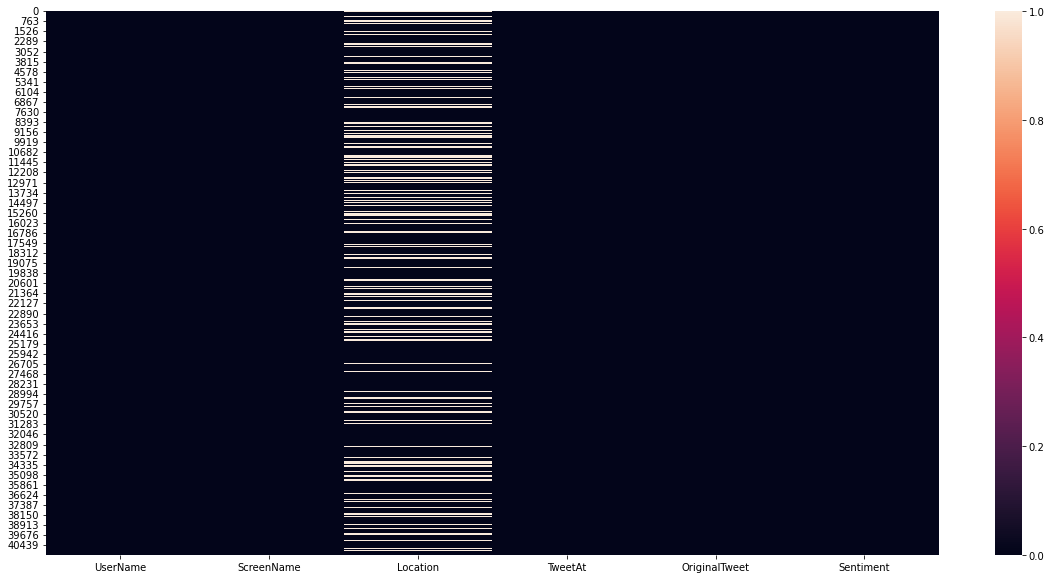

In [165]:
# let's plot a Heatmap to check the Nan values
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

## Knowing Dataset

##2.Understanding Variables

In [166]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [167]:
data.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

Variable Description
1.Username is Coded Username

2.ScreenName is Coded Screen name

3.Location is Region of origin of tweet.

4.Tweet at is Tweet timing.

5.OriginalTweet is First tweet in the thread.

6.Sentiment which is target Variable.

##Checking Unique values for each Variables.

In [168]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [169]:
data.Location.nunique()

12220

From this we get to know that unique value is relevant for only sentiment column or target variable.

#Data Wrangling

##Data Wrangling Code

In [170]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


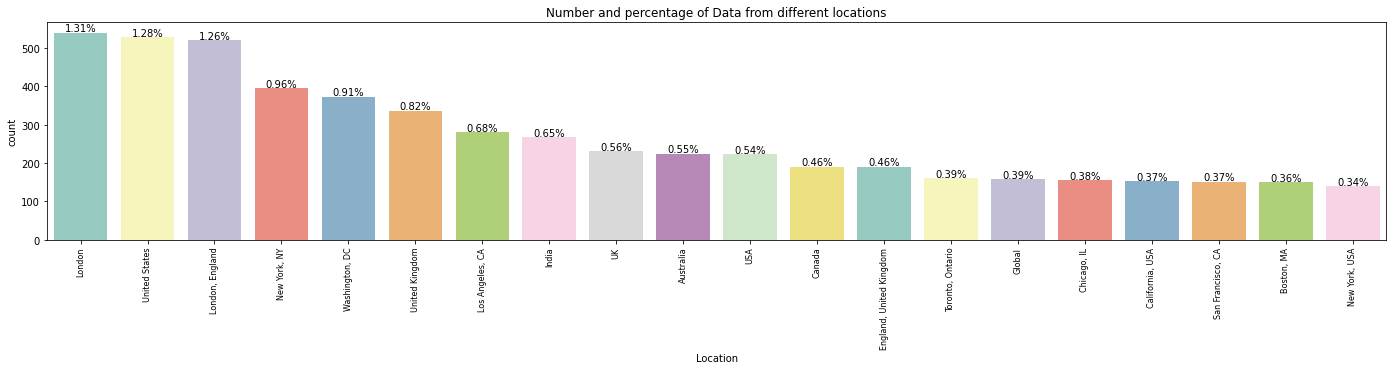

In [171]:
# Percentage of data from different locations
data_source("Location", "Data from different locations", data, 6)
     

The above observation shows that the number of data percentage wise from each country that of total data present. We can see that mainly United kingdom,United states of america , Indian and Canada are the countries from where tweet has been done. 

In [172]:

# Plot unique value across different columns
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe
     

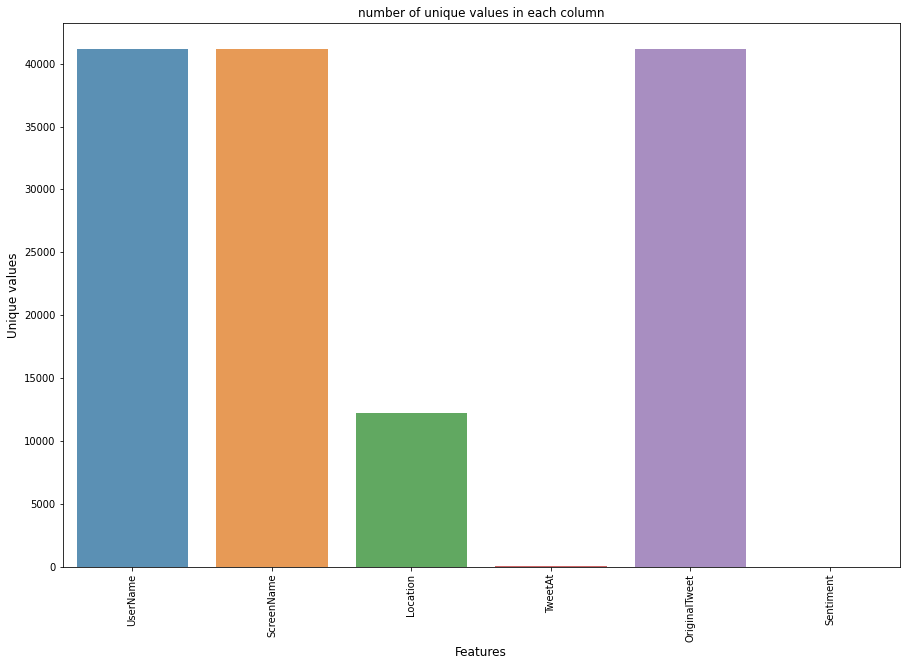

In [173]:
unique_data = unique_values(data)
f, ax = plt.subplots(1,1, figsize=(15,10))
sns.barplot(x=unique_data['Features'], y=unique_data['Uniques'], alpha=0.8)
plt.title('number of unique values in each column')
plt.ylabel('Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The number of unique value in different feature are as followed Username , ScreenName , OriginalTweet has unique values of around 40000 then followed by Location that is between 10000-15000. 

#Sample text of Sentiment.

In [174]:
data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

##Here we can see that the number of positive sentiment is highest.

#Now we will anlalyse the data in which we will  see the types of comment that are done by users regarding corona virus. This will help us to know the condition and mantle state of users.

In [175]:
data[data['Sentiment'] == 'Neutral']['OriginalTweet'].sample(10)

26589    What s going on with gold prices people Is it ...
12525    @Georgia_AG stop drug companies raise prices ?...
9771               Online shopping picks up in the face of
17189    Timed supermarket visits public transport rest...
3513     We're all in this together, so we have set who...
36945    Will this drastic change in consumer behavior ...
27930    famous retail malls which have been shut for 1...
11816    It's time to make @Google's "#small #local gro...
36968    A #COVID19 #coronavirus aerosol simulation: If...
12039    I came in contact with more people in the 15 m...
Name: OriginalTweet, dtype: object

In [176]:
data[data['Sentiment'] == 'Extremely Positive']['OriginalTweet'].sample(10)

22545    @Psikorps @GameSpot But anytime the supply has...
13796    Tonight as we started clapping,  the local sup...
26211    Regarding SNAP said the entitlement program wa...
34919    NATL POLL via @CSPI: 9 out of 10 consumers agr...
25917    Food banks are facing a dramatic increase in d...
4464     The corona virus is probably the greatest mark...
24274    @omkasera Dear Sir, how are we supposed to get...
22445    How are beauty and personal care businesses ad...
39922    Amidst the #COVID19 pandemic, @CarOffer_ has l...
28018    @Lowes is there a reason why youÂre not suppl...
Name: OriginalTweet, dtype: object

In [177]:
data[data['Sentiment'] == 'Positive']['OriginalTweet'].sample(10)

1825     Can we move to get grocery store employees PPE...
19718    @MorningConsult is hosting a webinar right now...
25742    Yes I am senior shaming my 73 year-old father ...
32437    With COVID-19 forcing shoppers to stay home an...
24715    Thank you to our farmers ranchers grocery stor...
16494    https://t.co/N0K1mMScu1\r\r\nThat's some effor...
13090    "The retail price of a 200 ml bottle of hand s...
37412    Do you need help with picking up your shopping...
3078     Pro tip as people are ignorant and just plain ...
32341    Louisiana Insurance Commissioner Jim Donelon a...
Name: OriginalTweet, dtype: object

In [178]:
data[data['Sentiment'] == 'Extremely Negative']['OriginalTweet'].sample(10)

33963    Crude prices could go negative while Alberta's...
22889    As the world grapples with the devastating eff...
34961    Will ppl and the #msm please STOP saying \r\r\...
7184     I reflected on my own consumer behaviour last ...
2405     Urgent travel warnings, supermarket chaos, and...
1782     STOP PANIC BUYING AND HOARDING. I work in a fo...
32874    Coronavirus-fueled panic buying cleared the sh...
28156    The amount of couples out shopping with their ...
10099    My parents canÂt get an online supermarket de...
25218    Unfortunately scammers are out there trying to...
Name: OriginalTweet, dtype: object

In [179]:
data[data['Sentiment'] == 'Negative']['OriginalTweet'].sample(10)

7788     Why Companies Can Regain Consumer Trust as Cri...
10517    19 It should be made a criminal offence for pe...
1987     #TuesdayThoughts on #COVID2019 - Not everyone ...
38244    I remember the days when I would queue to get ...
18760    @jidesanwoolu I suggested that you should pay ...
20426    Becky Tranchell wants the TC community as a wh...
40022    "For Trump, the economy is basically the stock...
32146    Dr. Birx warns that it is not the time to go t...
21905    In these trying moments, please use sanitizer ...
8485     Just went to @Tesco to get dog food to find pe...
Name: OriginalTweet, dtype: object

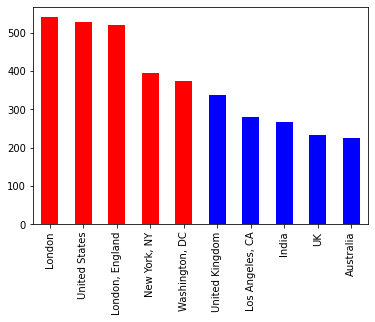

In [180]:
from matplotlib.figure import figaspect
country_location = data['Location'].value_counts().index

colors_location = ['red' if (x in country_location[:5]) else 'blue' for x in country_location]


data['Location'].value_counts()[0:10].plot(kind='bar',alpha =1,color=colors_location);


In [181]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:
import neattext.functions as nfx

In [183]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [184]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_urls)


In [185]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
11808  My homie got the virus in tuesday. \r\r\n\r\r\...   
23807  "While it is always a shame when food is waste...   
28622  The amount of rubber gloves on the ground at t...   
34088  Diamond Prices Slides in March as COVID-19 Spr...   
1251   Just seen this lad in age 13 14 take all the p...   
5375   March 15 President Trump held a phone call wit...   
6708   @PrdLiberal7 @EnseySherwood I work in a grocer...   
29015  When you trying to coordinate for the grocery ...   
25413  Fridge situation critical. Might have to ventu...   
6826   Someone has completed Supermarket Sweep #coron...   

                                              neat_tweet  
11808  My homie got the virus in tuesday. \r\r\n\r\r\...  
23807  "While it is always a shame when food is waste...  
28622  The amount of rubber gloves on the ground at t...  
34088  Diamond Prices Slides in March as COVID-19 Spr...  
1251   Just seen this lad in age 13 14 take all the p...  
5375   March 15 President Trump held a phone call wit...  
6708   @PrdLiberal7 @EnseySherwood I work in a grocer...  
29015  When you trying to coordinate for the grocery ...  
25413  Fridge situation critical. Might have to ventu...  
6826   Someone has completed Supermarket Sweep #coron...

In [186]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_numbers)

In [187]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
16887  New World supermarket in New Zealand provide s...   
11272  After consider under such situations that all ...   
33767  Patients and consumer advocates agree we must ...   
21034  The world's biggest #retailers are using their...   
38143  @MilenaRodban Been exchanging lusty looks with...   
30048  @PetSmart why are your stores still open? I am...   
33899  True. But if I can find some hand sanitizer, I...   
39809  Higher crude oil prices and #COVID2019 lockdow...   
9132   India should not let this crash in oil prices ...   
38026  What do y'all think about scheduling #grocery ...   

                                              neat_tweet  
16887  New World supermarket in New Zealand provide s...  
11272  After consider under such situations that all ...  
33767  Patients and consumer advocates agree we must ...  
21034  The world's biggest #retailers are using their...  
38143  @MilenaRodban Been exchanging lusty looks with...  
30048  @PetSmart why are your stores still open? I am...  
33899  True. But if I can find some hand sanitizer, I...  
39809  Higher crude oil prices and #COVID lockdown ex...  
9132   India should not let this crash in oil prices ...  
38026  What do y'all think about scheduling #grocery ...

In [188]:
data['neat_tweet'] = data['OriginalTweet'].str.lower()

In [189]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
11080  I went to the supermarket at lunchtime to get ...   
7280   Supermarket putting  1m into a community fund ...   
26688  With the oil and gas industry reeling, Trump c...   
36807  Sam s approach to hand sanitizer production is...   
7584   THE REAL HEROS : ItÂs not the film stars. Not...   
22211  Yogi Adityanath govt fixes prices of 11 essent...   
12559  HUL said its price changes are strategic portf...   
29336  @Academy does not care about anyone only money...   
37686  Not near a sink?\r\r\n\r\r\nDonÂt forget to u...   
11812  @aajtak @raghav_chadha @sardanarohit Indian al...   

                                              neat_tweet  
11080  i went to the supermarket at lunchtime to get ...  
7280   supermarket putting  1m into a community fund ...  
26688  with the oil and gas industry reeling, trump c...  
36807  sam s approach to hand sanitizer production is...  
7584   the real heros : itâs not the film stars. not...  
22211  yogi adityanath govt fixes prices of 11 essent...  
12559  hul said its price changes are strategic portf...  
29336  @academy does not care about anyone only money...  
37686  not near a sink?\r\r\n\r\r\ndonât forget to u...  
11812  @aajtak @raghav_chadha @sardanarohit indian al...

In [190]:
 data['extracted_hashtags']=data['OriginalTweet'].apply(nfx.extract_hashtags)

In [191]:
data.loc[:,['OriginalTweet','extracted_hashtags']].sample(10)

OriginalTweet  \
33418  Our food bank could run out of stock before th...   
2388   DonÂt forget about the grocery store and gas ...   
7552   Ocado expected to impose rationing on more pro...   
35988  Professor Hannah Bloch Wehba was quoted in an ...   
23764  Love our neighbourhood. This clap is for ANYON...   
17577  #coronavirus #earthquake #storm non-seasonal #...   
1628   ItÂs interesting to see the amount of people ...   
38417  While supermarket meat sales are way up, since...   
10215  1% can be one of my parents #StayTheFHome #Sto...   
39508  In collaboration with our partners we strive t...   

                                      extracted_hashtags  
33418                                                 []  
2388                                      [#coronavirus]  
7552   [#coronavirus, #COVID19, #COVID?19, #?????????...  
35988                                                 []  
23764  [#clapfornhs, #nhs, #rochdale, #castleton, #co...  
17577  [#coronavirus, #earthquake, #storm, #rain, #lo...  
1628   [#groceryshopping, #coronavirus, #StopPanicBuy...  
38417                                                 []  
10215  [#StayTheFHome, #StopHoarding, #ShelterAtHome,...  
39508                                                 []

In [192]:
data['neat_tweet']=data['OriginalTweet'].apply(nfx.remove_hashtags)

In [193]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
39208  You can help prevent the spread of #coronaviru...   
12076  We need to figure out how to step up online en...   
26696  From supermarket fights to superannuations to ...   
35800  But seriously is there a shortage of toilet pa...   
35881  Social Media Users More Likely to Increase Alc...   
17661  @GavinNewsom GavinNewsom Gov. Newsom: Elderly ...   
6535   ?My God. A #NY hospital is *already* overwhelm...   
34958  With apologies, this is that @Talkwalker post....   
14518  Extending the Online shopping, on-premises ser...   
35228  IÂm so excited. IÂm saving hundreds on gas. ...   

                                              neat_tweet  
39208  You can help prevent the spread of   by washin...  
12076  We need to figure out how to step up online en...  
26696  From supermarket fights to superannuations to ...  
35800  But seriously is there a shortage of toilet pa...  
35881  Social Media Users More Likely to Increase Alc...  
17661  @GavinNewsom GavinNewsom Gov. Newsom: Elderly ...  
6535   ?My God. A   hospital is *already* overwhelmed...  
34958  With apologies, this is that @Talkwalker post....  
14518  Extending the Online shopping, on-premises ser...  
35228  IÂm so excited. IÂm saving hundreds on gas. ...

In [194]:
data['neat_tweet']=data['neat_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [195]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
16736  @WOOLWORTHS_SA @the_dti @HealthZA  I see Woolw...   
30961  Due to the COVID-19 pandemic, North Carolina A...   
19056  As COVID 19 continues to spread our Chief Econ...   
37690  Thank you to those on the front lines\r\r\nTha...   
40474  #CBD has been touted as a treatment for nearly...   
1370   Tomahawk ribeye, quarantine food! What did you...   
21266  What should you avoid touching without sanitiz...   
41024  @AIReDaily Agreed ... but then this industry m...   
40977  Dear Consumer, in view of spread of #Covid 19 ...   
33041  @elcompanies Impressive array of global assist...   

                                              neat_tweet  
16736         I see Woolworths increased the prices, ...  
30961  Due to the COVID-19 pandemic, North Carolina A...  
19056  As COVID 19 continues to spread our Chief Econ...  
37690  Thank you to those on the front lines\r\r\nTha...  
40474    has been touted as a treatment for nearly ev...  
1370   Tomahawk ribeye, quarantine food! What did you...  
21266  What should you avoid touching without sanitiz...  
41024    Agreed ... but then this industry must impro...  
40977  Dear Consumer, in view of spread of   19 pande...  
33041    Impressive array of global assistance effort...

In [196]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_multiple_spaces)

In [197]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_urls)

In [198]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_puncts)

In [199]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
16283  Off to Tesco this morning to take advantage of...   
37867  Why are people still hoarding #toiletpaper pap...   
26264  Some consumer friendly news in the time of Fir...   
30726  Coronavirus: A wake-up call for global consume...   
39367  This is a chaotic time for many of us. How bes...   
34682  Coronavirus Be Creating New Dealers #joshmchip...   
37550  Do you [@Jack4NJ]  think @GovMurphy would be d...   
1144   If you see me in Home Depot or the grocery sto...   
30563  @DSGovernment @IAOkowa @OfficialPDPNig @toluol...   
25491  ignore #coronavirus for a moment and look at c...   

                                              neat_tweet  
16283  Off to Tesco this morning to take advantage of...  
37867  Why are people still hoarding paper Diarrhea i...  
26264  Some consumer friendly news in the time of Fir...  
30726  Coronavirus: A wakeup call for global consumer...  
39367  This is a chaotic time for many of us How best...  
34682               Coronavirus Be Creating New Dealers   
37550  Do you [ think would be doing anything differe...  
1144   If you see me in Home Depot or the grocery sto...  
30563   ItÂs bad to add more pains to that of the co...  
25491  ignore for a moment and look at consumer confi...

In [200]:
data['neat_tweet'] = data['neat_tweet'].apply(lambda x: nfx.remove_stopwords(x,lang='en'))

#**Tokenization**

In [201]:
tokenized_tweet = data['neat_tweet'].apply(lambda x: x.split())

In [202]:
tokenized_tweet.sample(3)

8409     [Buy, Anti, amp, Pollution, Best, Prices, Orde...
29439    [Love, Victoria, helps, food, production, 1st,...
2428     [Kinda, like, prioritizing, grocery, store, em...
Name: neat_tweet, dtype: object

In [203]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [204]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [205]:
data['neat_tweet'] = tokenized_tweet

#**Wordplay**

In [206]:
pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [207]:
from wordcloud import WordCloud

import wikipedia


In [208]:
all_words = ' '.join(text for text in data['neat_tweet'])

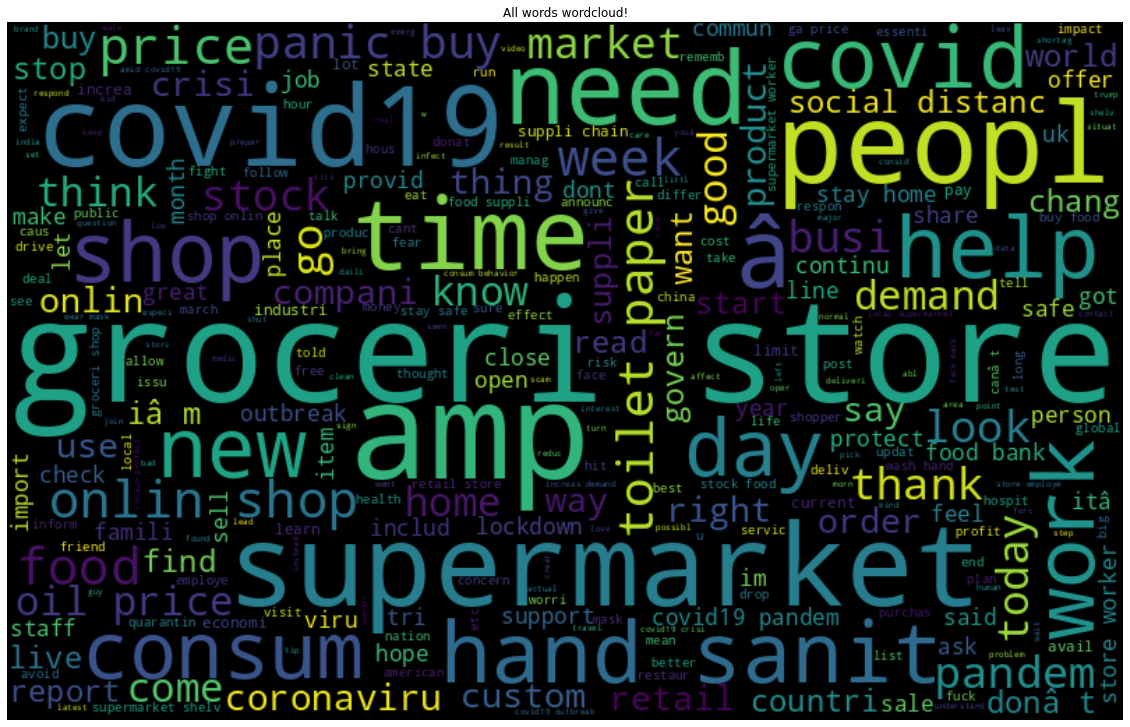

In [209]:
all_words_cloud = WordCloud(width=800, height=500, max_font_size=200,max_words=300).generate(all_words)
plt.figure(figsize=(20, 15))
plt.title('All words wordcloud!')

plt.imshow(all_words_cloud, interpolation="bilinear")
plt.axis('off');

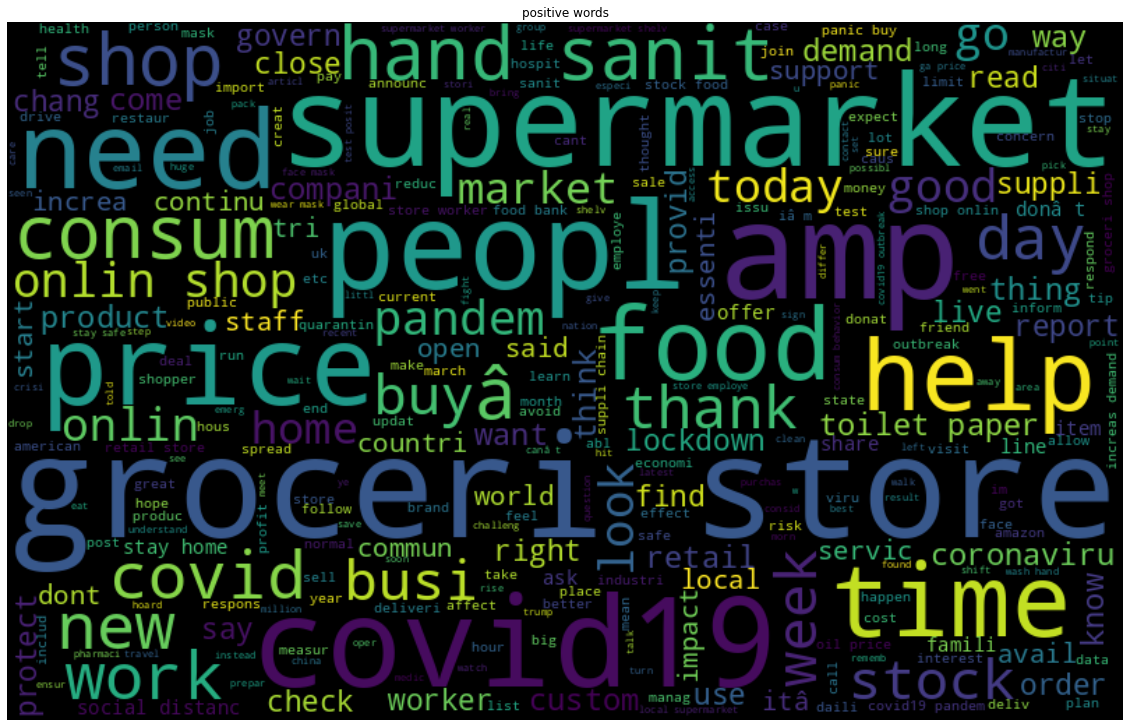

In [210]:
positive_words = ' '.join(text for text in data[data['Sentiment']=='Positive']['neat_tweet'])


positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(positive_words)
plt.figure(figsize=(20, 15))
plt.title('positive words')
plt.imshow(positive_words_cloud, interpolation="bilinear")
plt.axis('off');

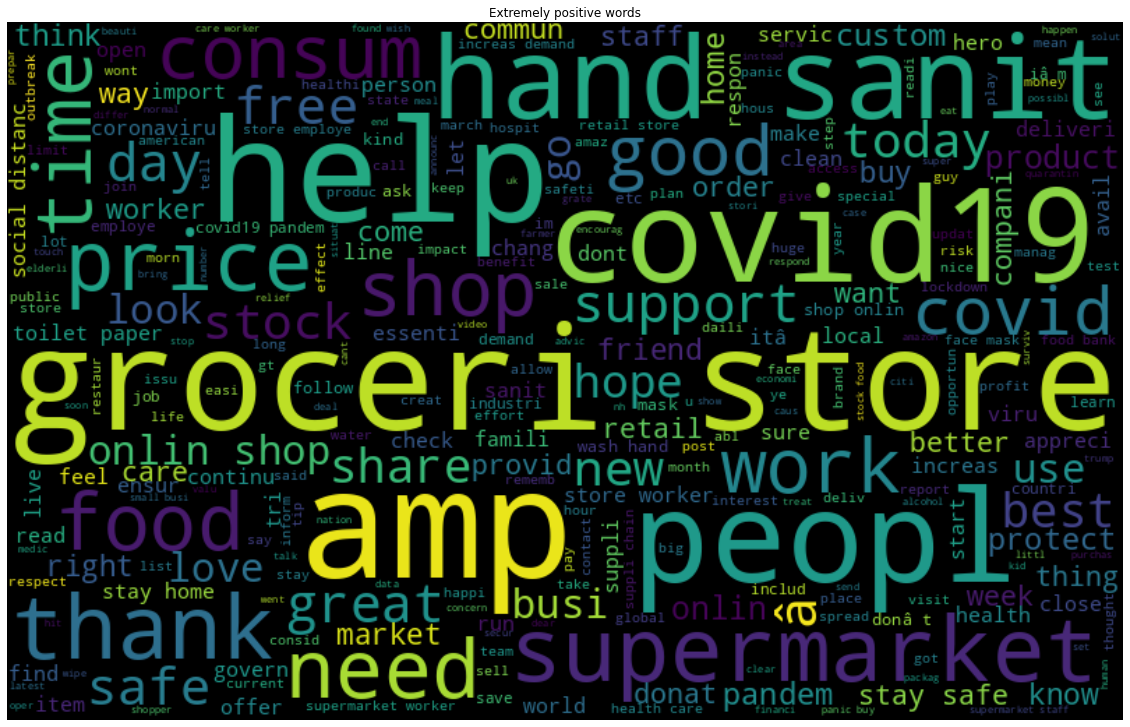

In [211]:
extremly_positive_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Positive']['neat_tweet'])


extremly_positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_positive_words)
plt.figure(figsize=(20, 15))
plt.title('Extremely positive words')
plt.imshow(extremly_positive_words_cloud, interpolation="bilinear")
plt.axis('off');

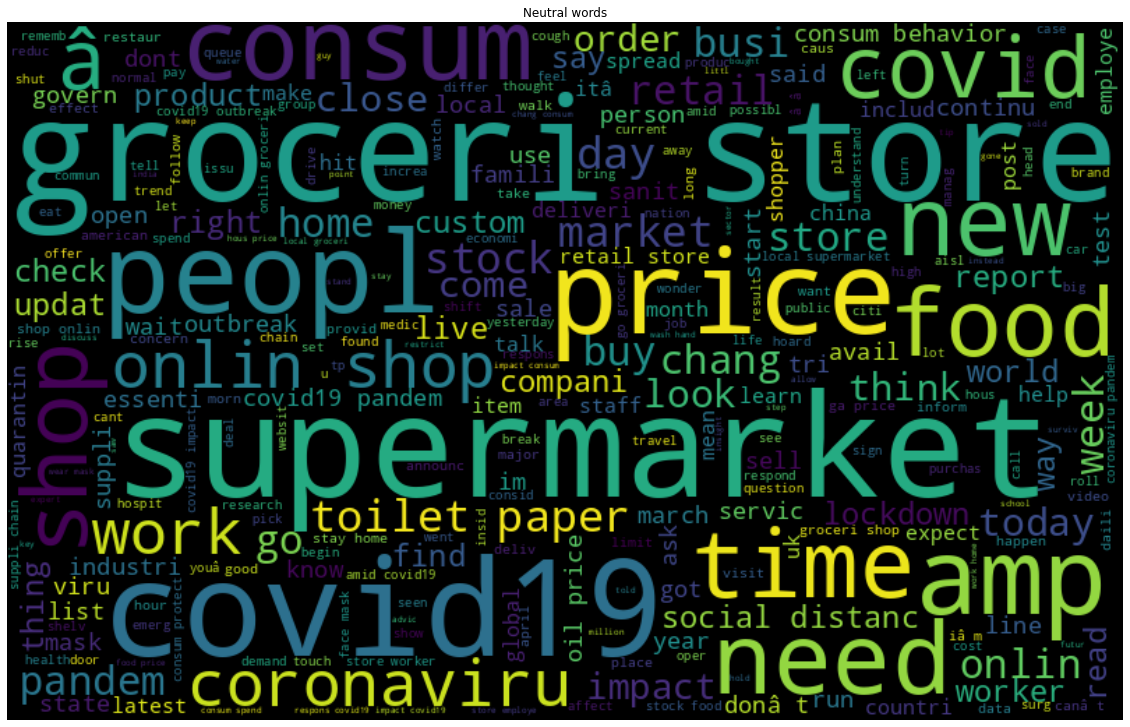

In [212]:
neutral_words = ' '.join(text for text in data[data['Sentiment']=='Neutral']['neat_tweet'])


neutral_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(neutral_words)
plt.figure(figsize=(20, 15))
plt.title('Neutral words')
plt.imshow(neutral_words_cloud, interpolation="bilinear")
plt.axis('off');

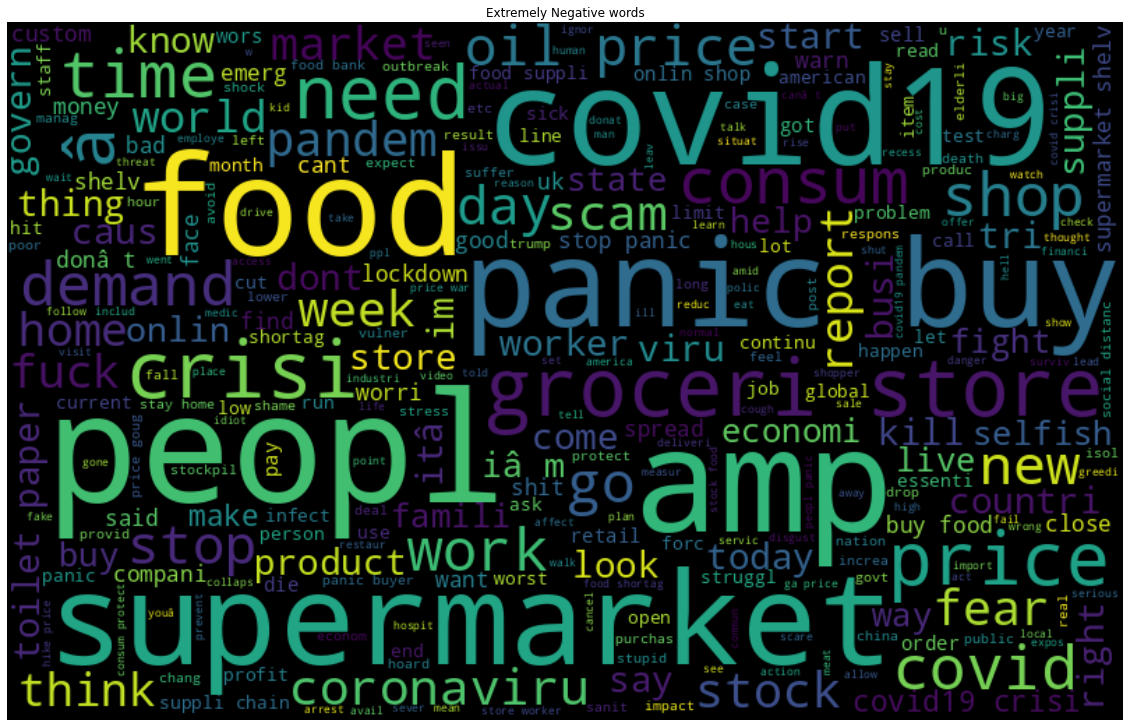

In [213]:
extremly_negative_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Negative']['neat_tweet'])


extremly_negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_negative_words)
plt.figure(figsize=(20, 15))
plt.title('Extremely Negative words')
plt.imshow(extremly_negative_words_cloud, interpolation="bilinear")
plt.axis('off');

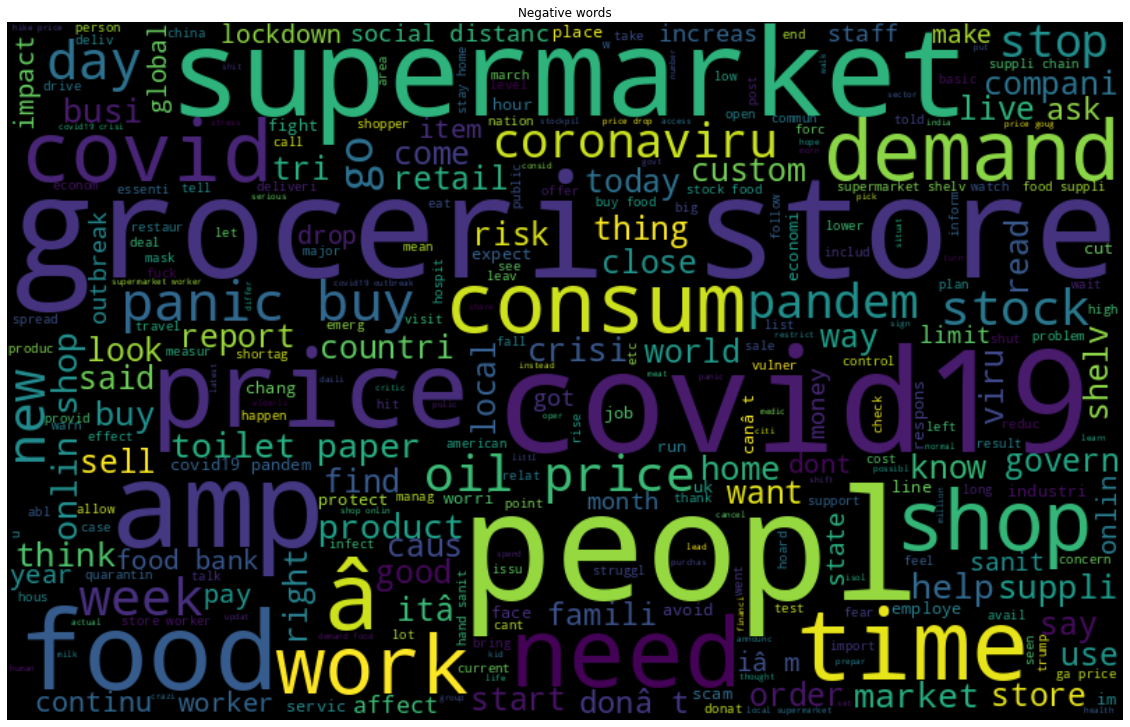

In [214]:
negative_words = ' '.join(text for text in data[data['Sentiment']=='Negative']['neat_tweet'])


negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(negative_words)
plt.figure(figsize=(20, 15))
plt.title('Negative words')
plt.imshow(negative_words_cloud, interpolation="bilinear")
plt.axis('off');

In [215]:
data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet'],axis =1,inplace=True)

In [216]:
X = data['neat_tweet']
y = data['Sentiment']

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [218]:
print(f'train shape { X_train.shape} and { y_train.shape} ')
print(f'test shape { X_test.shape} and { y_test.shape} ')

train shape (32925,) and (32925,) 
test shape (8232,) and (8232,) 


In [219]:
data['neat_tweet'].isnull().sum()

0

In [220]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [221]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [222]:
from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train,y_train)
NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.7000151860288535
Validation accuracy Score :  0.46379980563654033
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.62      0.46       655
Extremely Positive       0.41      0.59      0.49       936
          Negative       0.51      0.42      0.46      2416
           Neutral       0.29      0.67      0.40       670
          Positive       0.61      0.39      0.48      3555

          accuracy                           0.46      8232
         macro avg       0.44      0.54      0.46      8232
      weighted avg       0.52      0.46      0.47      8232



In [250]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy[i]) 
print(test_accuracy[i] )

0.7101594533029613
0.673226433430515


In [251]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score   : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score   :  0.9389825360668185
Validation accuracy Score :  0.8652818270165209
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2834
           1       0.92      0.87      0.89      5398

    accuracy                           0.87      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.87      0.87      8232



In [252]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier(tree_method='hist')

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.8503568716780562
Validation accuracy Score :  0.8141399416909622
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      2315
           1       0.93      0.81      0.86      5917

    accuracy                           0.81      8232
   macro avg       0.78      0.82      0.79      8232
weighted avg       0.84      0.81      0.82      8232



In [253]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.958663629460896
Validation accuracy Score :  0.8400145772594753
              precision    recall  f1-score   support

           0       0.69      0.86      0.76      2462
           1       0.93      0.83      0.88      5770

    accuracy                           0.84      8232
   macro avg       0.81      0.85      0.82      8232
weighted avg       0.86      0.84      0.84      8232



In [254]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9406226271829916
Validation accuracy Score :  0.8623663751214772
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2732
           1       0.92      0.87      0.89      5500

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [255]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
               'Naive Bayes', 
              'Stochastic Gradient Decent','xgboost',],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
               NB_accuracy, 
              sgd_accuracy,xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
3  Stochastic Gradient Decent       0.865282
1         Logistic Regression       0.862366
0     Support Vector Machines       0.840015
4                     xgboost       0.814140
2                 Naive Bayes       0.790938

In [235]:
data_bin = data.copy()

In [236]:
data_bin['Sentiment'] = data_bin['Sentiment'].apply(lambda x: 1 if (x=='Positive' or x== 'Extremely Positive' or x== 'Neutral' ) else 0)

In [237]:
data_bin['Sentiment'].value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [238]:
X= data_bin['neat_tweet']
y = data_bin['Sentiment']

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [240]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [241]:
from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train,y_train)
NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Test accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

Training accuracy Score    :  0.8680030372057707
Test accuracy Score :  0.7909378036929058
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      2758
           1       0.86      0.81      0.84      5474

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.80      0.79      0.79      8232



In [242]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Test accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9997570235383447
Test accuracy Score :  0.8294460641399417
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      2739
           1       0.90      0.84      0.87      5493

    accuracy                           0.83      8232
   macro avg       0.81      0.82      0.81      8232
weighted avg       0.84      0.83      0.83      8232



In [243]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9406226271829916
Test accuracy Score :  0.8623663751214772
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2732
           1       0.92      0.87      0.89      5500

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [244]:
import xgboost as xgb
xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_train, y_train)
xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy score: ",xgboost_clf.score(X_train,y_train))
print("Test accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy score:  0.8503568716780562
Test accuracy Score :  0.8137755102040817
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      2314
           1       0.93      0.81      0.86      5918

    accuracy                           0.81      8232
   macro avg       0.78      0.82      0.79      8232
weighted avg       0.84      0.81      0.82      8232



In [245]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.958663629460896
Validation accuracy Score :  0.8400145772594753
              precision    recall  f1-score   support

           0       0.69      0.86      0.76      2462
           1       0.93      0.83      0.88      5770

    accuracy                           0.84      8232
   macro avg       0.81      0.85      0.82      8232
weighted avg       0.86      0.84      0.84      8232



In [246]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
sgd_clf.fit(X_train,y_train)
sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score   : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score   :  0.9389825360668185
Validation accuracy Score :  0.8652818270165209
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2834
           1       0.92      0.87      0.89      5398

    accuracy                           0.87      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.87      0.87      8232



In [247]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
4  Stochastic Gradient Decent       0.865282
1         Logistic Regression       0.862366
0     Support Vector Machines       0.840015
2               Random Forest       0.829446
5                     XGBoost       0.813776
3                 Naive Bayes       0.790938

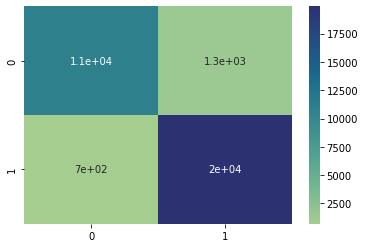

In [248]:
# Confusion matrix for training set with SGDclassifier
train_preds = sgd_clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train,train_preds),annot= True,cmap="crest");

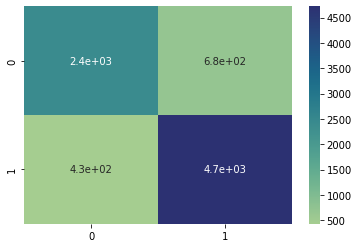

In [249]:
sns.heatmap(confusion_matrix(y_test,sgd_prediction),annot= True,cmap="crest");

#** Conclusion**
From above discussion we first evaluated the the model on the basis of multipleclassification where we have taken multiple sentiments into consideration which includes positive ,negative,neutral, extremely positive and extremely negative sentiment.

* After applying various classification algorithm we come to a conclusion that the best is stochastic gradient Descent with a score of 86.582 percent.
* After multiple classification we divided our data into binary classification, in which extremely positive, positive and netral are taken as 1 and extremely negative and negative are taken as 0 for classification.
* The output after Deploying various Model into the system remains the same and the best algorithm comes out to be Stochastic Gradient Descent. 